# **Ensemble methods**

# Iris Dataset

Il dataset Iris è un classico dataset nell'apprendimento automatico e nella statistica, introdotto da Ronald Fisher nel 1936. È comunemente utilizzato per attività di classificazione e clustering.

## Caratteristiche e Struttura
- **Campioni**: 150 campioni di fiori iris.
- **Features**:
  - Lunghezza del sepalo (cm)
  - Larghezza del sepalo (cm)
  - Lunghezza del petalo (cm)
  - Larghezza del petalo (cm)
- **Classi (Etichette Target)**:
  - *Iris-setosa*
  - *Iris-versicolor*
  - *Iris-virginica*

Ogni classe è rappresentata da 50 campioni.

## Caratteristiche Principali
- **Balanced Dataset**: Ogni classe contiene lo stesso numero di campioni.
- **Perfect for Beginners**: a sua semplicità e struttura ben definita lo rendono perfetto per scopi didattici.
- **Separable Classes**:
  - *Iris-setosa* è linearmente separabile dalle altre due classi.
  - *Iris-versicolor* e *Iris-virginica* sono più difficili da separare tra loro.


# Iris Dataset Classes

<table>
    <tr>
        <th>Iris Setosa</th>
        <th>Iris Versicolor</th>
        <th>Iris Virginica</th>
    </tr>
    <tr>
        <td><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFn-u9Lagrv8pV4zJ8Z1cEqXNL_uo39CrL6A&s" alt="Iris setosa" width="300" height="300"></td>
        <td><img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSJqxUtJiLfMX5aIoyPTPz7rMdjxgWagMlBzt0QbfATKzRqH4XnMMDN5aBrU1FvRt19jkHMOrIefjywQlDg9rOeKC6JbA72Wf--jqHD-g" alt="Iris versicolor" alt="Iris versicolor" width="300" height="300"></td>
        <td><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQbTwTLA7_7SeTE3B1QOKw0TlB8Rp6NU7vyg&s" alt="Iris virginica" width="300" height="300"></td>
    </tr>
</table>



# `plot_decision_boundary` Function

La funzione `plot_decision_boundary` permette di visualizzare i margini decisionali di un classificatore. In questo modo è possibile visualizzare come il modello distingue le feature di campioni assegnati a classi diverse.

1. **Parametri**:
    - `clf`: Il classificatore allenato che ha il metodo `predict`.
    - `X`: La matrice dei dati di input, per cui si assume una dimensione 2D per la visualizzazione.
    - `y`: Le labels corrispondenti ai dati `X`.

2. **Output**:
    - Un grafico 2D contenente:
        - **Features**: `Feature 1` e `Feature 2` lungo l' asse x e y (se è stata usata PCA, queste sono le 2 componenti).
        - **Regioni decisionali**: Colori diversi indicano regioni classificate come labels diverse.
        - **Camponi**: I punti del dataset (`X`) sono sovrapposti alle regioni e colorati in base alla loro label corretta (`y`).

### **Sintassi**

```python
plot_decision_boundary(trained_model, X_data, y_data)
```


In [1]:
# Helper function to create the plot
# and visualize the decision boundary
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

## Funzione `train_test_split()` :

---

## **train_test_split()**

La funzione `train_test_split()` è parte del modulo `sklearn.model_selection`. Viene utilizzata per dividere un dataset in training e test set.


### **Esempio**:
```python
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")
```


# **Esercizio 1: Classifichiamo il dataset Iris con un DecisionTree**

Eseguire tutti gli step di preparazione per l' allenamento di un DecisionTree. Per lo split dai dati in training e test utilizzare:

- `test_size` = `0.3`

- `random_state` = `42`

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# svolgimento...
training_set, test_set, training_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

pca = PCA(n_components=2)
training_set = pca.fit_transform(training_set)
test_set = pca.transform(test_set)

model = DecisionTreeClassifier()
model.fit(training_set, training_label)
predictions = model.predict(test_set)

accuracy = accuracy_score(predictions, test_label)
print(accuracy)

0.8666666666666667


# **Eesercizio 2: Implementare ensamble methods**

Una volta allenato il DecisionTree nell' esercizio 1, vogliamo applicarvi i metodi di ensamble. Nello specifico andremo a implementare:

* **AdaBoost**
* **Bagging**
* **Random Forest**

Di seguito vediamo la sintassi di ognuno di questi.

## 1. **AdaBoostClassifier**: 

L' `AdaBoostClassifier` crea un insieme di alberi decisionali deboli. Assegna un peso a ciascun albero e li combina per formare un modello più robusto.

### Example:
```python
from sklearn.ensemble import AdaBoostClassifier

# Train the model
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Get predictions
predictions = ada_clf.predict(X_test)

```

---

## 2. **RandomForestClassifier**: 

Il `RandomForestClassifier` costruisce più alberi in parallelo e combina i loro risultati per migliorare l'accuratezza.

### Example:
```python
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predictions
predictions = rf_clf.predict(X_test)

```

#### **N.B. RandomForest non richiede come argomento il classificatore, differentemente dagli altri metodi.**

---

## 3. **BaggingClassifier**:

Il `BaggingClassifier` combina molteplici modelli base (come DecisionTree) utilizzando la tecnica del bootstrapping per ridurre la varianza.

### Example:
```python
from sklearn.ensemble import BaggingClassifier

# Train the model
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)

# Get predictions
predictions = bag_clf.predict(X_test)

```


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6


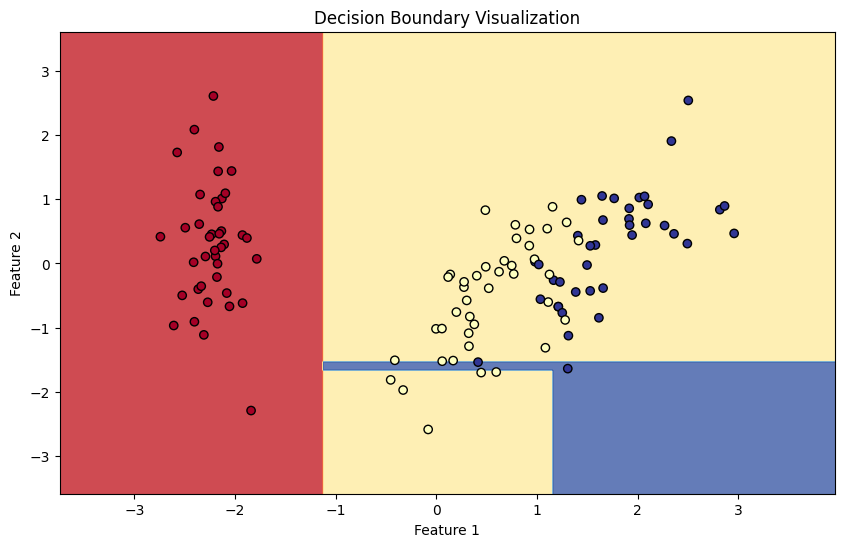

Accuracy: 0.9


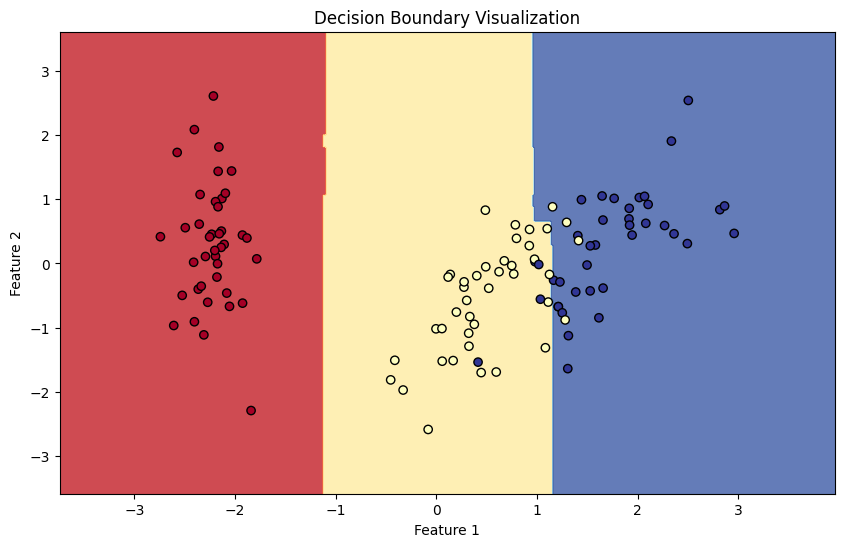

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8666666666666667


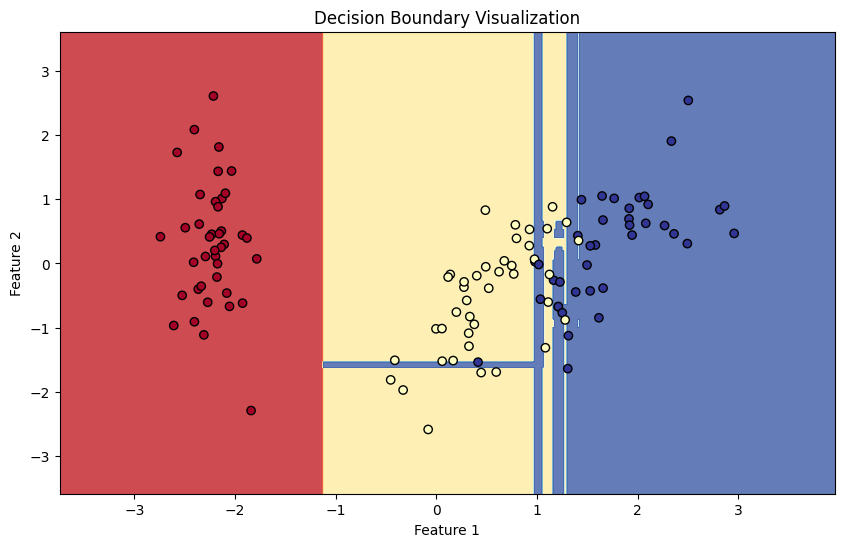

In [6]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
# svolgimento...

models = [
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
]

# Allenare i modelli
# Valutare e stampare le prestazioni dei modelli

# svolgimento...
for model in models:
    model.fit(training_set, training_label)
    print("Accuracy: " + str(accuracy_score(model.predict(test_set), test_label)))
    plot_decision_boundary(model, training_set, training_label)


# Funzioni utili per Ensemble Models

---

## **1. Hard Voting tra tre classificatori**

### **Descrizione**:
Combina le predizioni da tre classificatori selezionando la casse più votata per ogni campione.

### **Parametri**:
- `pred1` (numpy array): Predizioni del classificatore 1.
- `pred2` (numpy array): Predizioni del classificatore 2.
- `pred3` (numpy array): Predizioni del classificatore 3.

### **Output**:
- Restituisce un numpy array conenente la classe più votata per ogni campione.

### **Sintassi**:
```python
voted = hard_voting(pred1_test, pred2_test, pred3_test)
print("Hard Voting Predictions:", voted)
```

---

## **2. Allineare predizioni a più classi**

### **Descrizione**:
Allinea le probabilità in modo da rendere compatibili diversi subsets quando vengono combinati.

### **Parametri**:
- `pred` (numpy array): Probabilità predette da un classificatore.
- `classes_present` (list): Classi conosciute dal classificatore.
- `n_classes` (int, optional): Numero totale di classe, default è 3.

### **Output**:
- Ritorna un numpy array con le proabilità allineate tra tutte le classi
- Returns a numpy array with probabilities aligned across all classes.

### **Sintassi**:
```python
aligned_probs = align_predictions(pred, [0, 1], n_classes=3)
print("Aligned Probabilities:", aligned_probs)

Matrice originale [[0.7, 0.3], [0.4, 0.6]]
diventa
Matrice allineata [[0.7, 0, 0.3], [0.4, 0, 0.6]]

```

---

## **3. Plot Decision Boundary**

### **Descrizione**:
Visualizza i margini decisionali per vari ensamble methods, inclusi `expert1`, `expert2`, `expert3`, `base`, `soft_voting`, `hard_voting`, e `gating`.

### **Parametri**:
- `X` (numpy array): Dati per la visualizzazione (2D).
- `y` (numpy array): Lables originali.
- `clf1`, `clf2`, `clf3` (classifiers, optional): Esperti usati per calcolare prediction.
- `base` (classifier, optional): Classificatore base.
- `mode` (string): Metodo di ensamble per la visualizzazione. I valori possibili sono: `"expert1"`, `"expert2"`, `"expert3"`, `"base"`, `"soft_voting"`, `"hard_voting"`, `"gating"`.


### **Output**:
- Displays a decision boundary plot for the selected mode.

### **Usage**:
```python
plot_decision_boundary(x_test, y_test, expert1=expert1, clf2=expert2, clf3=expert3, base=base_network, mode="soft_voting")
```


# **Esercizio 3: Implementare Mixture of Experts**

Nel seguente esercizio vogliamo implementare un meccanismo di Mixture of Experts. Poichè in iris sono presenti 3 classi, vogliamo allenare 3 classificatori (cioè 3 esperi), rispettivamente:

- esperto 1: riconosce tra la classe 0 e la classe 1.
- esperto 2: riconosce tra la classe 0 e la classe 2.
- esperto 3: riconosce tra la classe 1 e la classe 2.

Infine utilizzare la funzione `plot_modes` per plottare le diverse modalità.

In [7]:
def hard_voting(pred1, pred2, pred3):
    combined = np.vstack([pred1, pred2, pred3]).T
    voted = []
    for sample in combined:
        counts = np.bincount(sample)
        most_common_label = counts.argmax()
        voted.append(most_common_label)
    return np.array(voted)

def align_predictions(pred, classes_present, n_classes=3):
    aligned = np.zeros((len(pred), n_classes))
    for idx, class_label in enumerate(classes_present):
        aligned[:, class_label] = pred[:, idx]
    return aligned

def plot_modes(X, y, clf1=None, clf2=None, clf3=None, base=None, mode="expert1"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if mode.startswith("expert"):
        expert_map = {
            "expert1": (clf1, [0, 1]),
            "expert2": (clf2, [0, 2]),
            "expert3": (clf3, [1, 2]),
        }
        clf, classes = expert_map[mode]
        Z = clf.predict(grid).reshape(xx.shape)
        title = f"Decision Boundary - {mode.capitalize()}"

    elif mode == "base":
        Z = base.predict(grid).reshape(xx.shape)
        title = "Decision Boundary - Base Network"

    elif mode == "soft_voting":
        Z1 = align_predictions(clf1.predict_proba(grid), [0, 1])
        Z2 = align_predictions(clf2.predict_proba(grid), [0, 2])
        Z3 = align_predictions(clf3.predict_proba(grid), [1, 2])
        Z = (Z1 + Z2 + Z3).argmax(axis=1).reshape(xx.shape)
        title = "Decision Boundary - Soft Voting"

    elif mode == "hard_voting":
        Z1 = clf1.predict(grid)
        Z2 = clf2.predict(grid)
        Z3 = clf3.predict(grid)
        Z = np.array([Z1, Z2, Z3])
        Z = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=Z)
        Z = Z.reshape(xx.shape)
        title = "Decision Boundary - Hard Voting"

    elif mode == "gating":
        gating_weights = base.predict_proba(grid)
        gating_weights /= gating_weights.sum(axis=1, keepdims=True)
        Z1 = align_predictions(clf1.predict_proba(grid), [0, 1])
        Z2 = align_predictions(clf2.predict_proba(grid), [0, 2])
        Z3 = align_predictions(clf3.predict_proba(grid), [1, 2])
        Z = gating_weights * Z1 + gating_weights * Z2 + gating_weights * Z3
        Z = Z.argmax(axis=1).reshape(xx.shape)
        title = "Decision Boundary - Mixture of Experts (Gating)"

    else:
        raise ValueError(f"Unknown mode: {mode}")

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

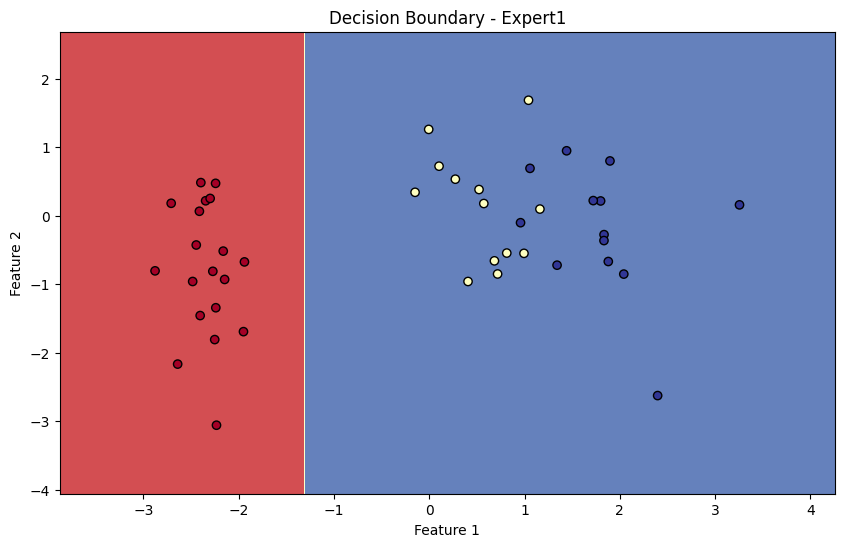

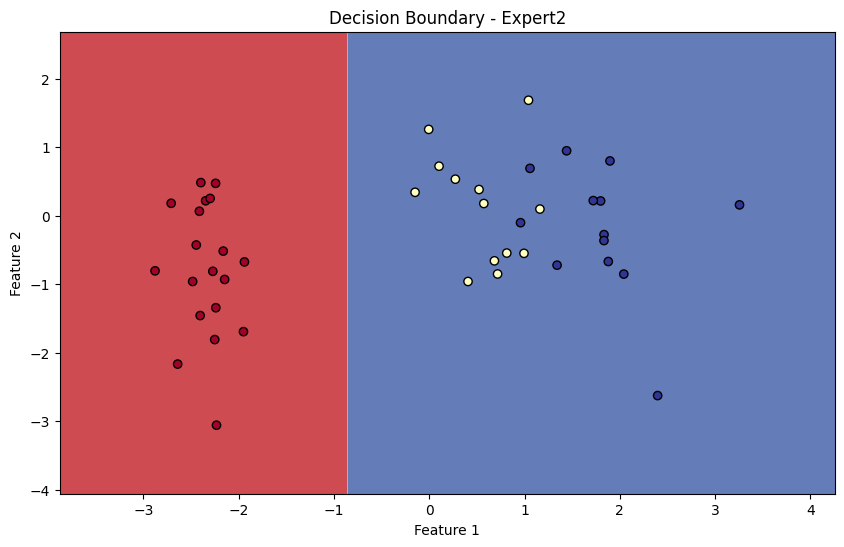

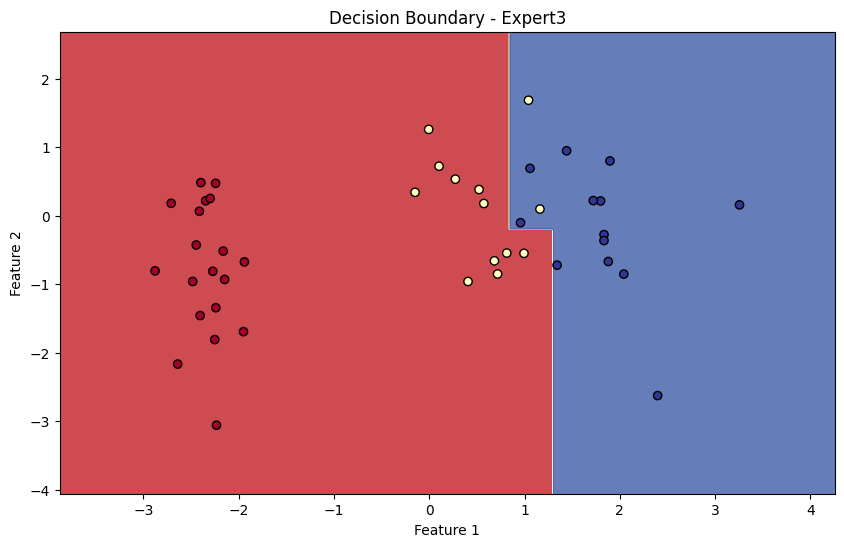

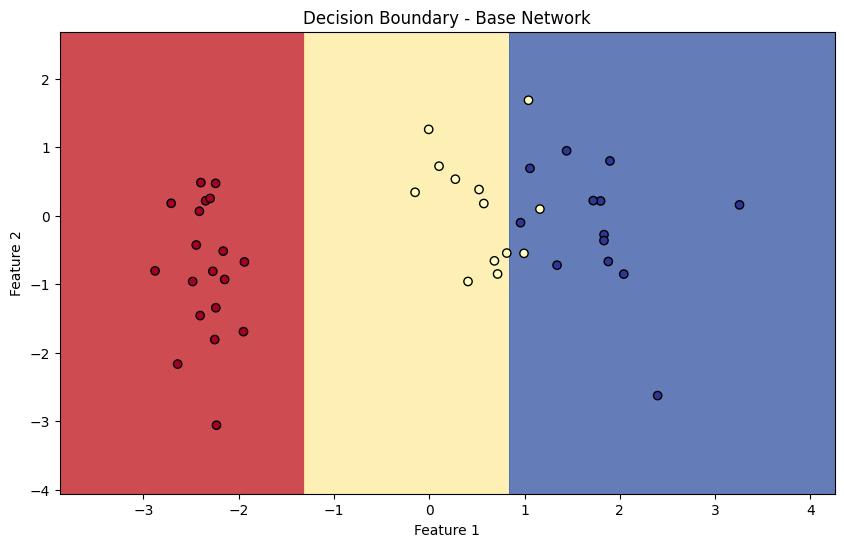

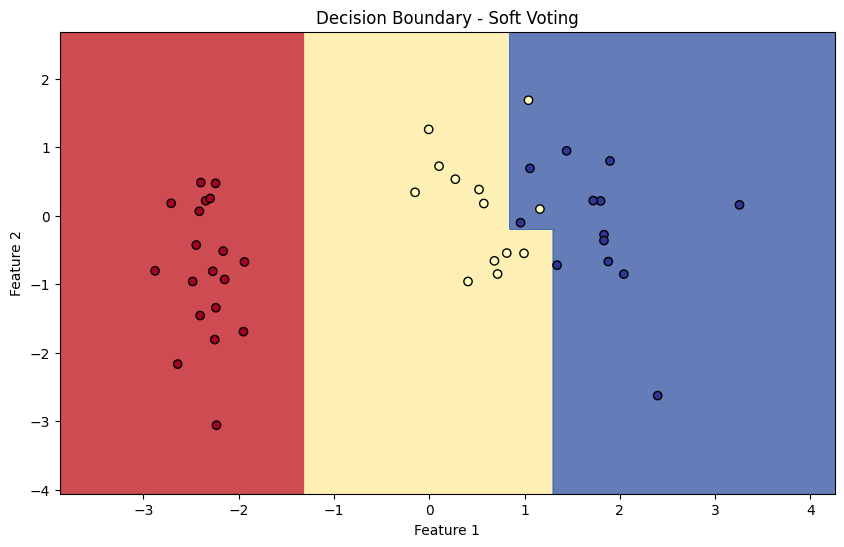

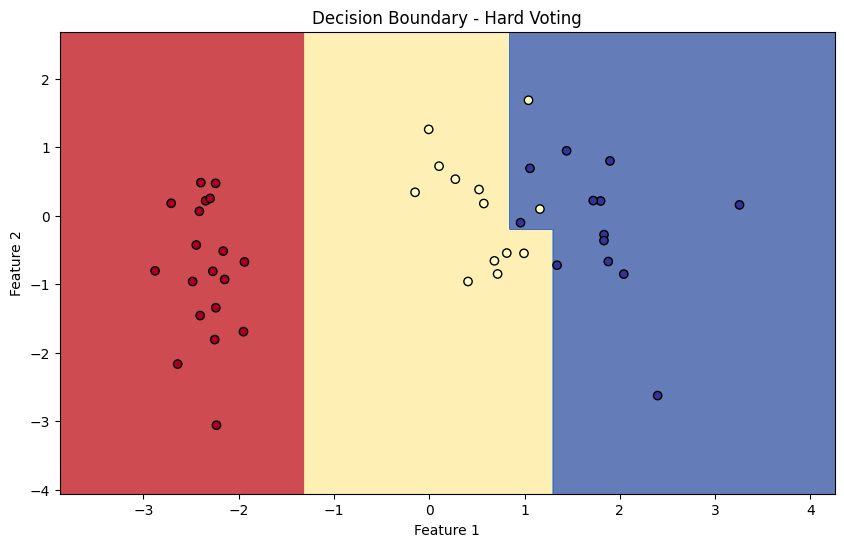

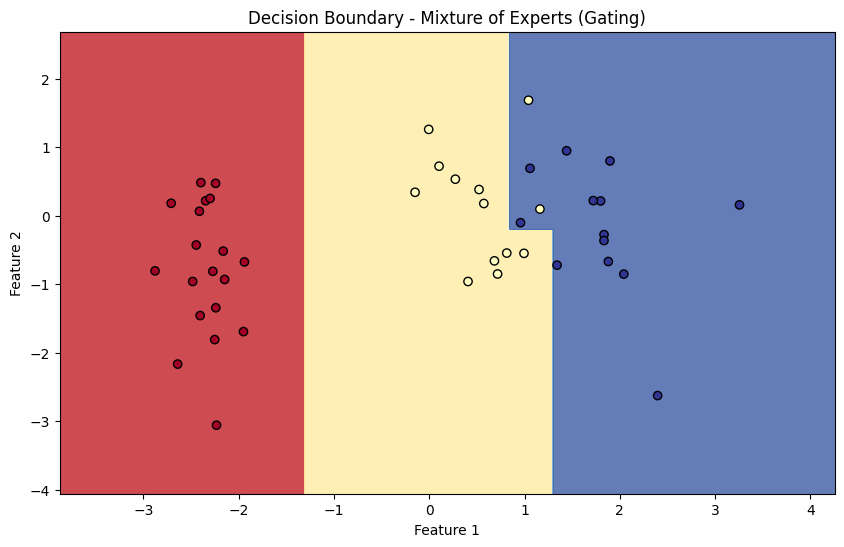

In [8]:
# Caricare il dataset Iris

# svolgimento...
iris = load_iris()
X = iris.data
y = iris.target

# Split del dataset in training e test set

# svolgimento...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applicare lo scaling e PCA

# svolgimento...
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test  = s.transform(X_test)

pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

# Creare 3 modelli di Decision Tree, ognuno dovrà essere esperto in una coppia di classi
# N.B. ogni esperto dovrà essere allenato su un sottoinsieme contentente solo 
# le classi di competenza

# svolgimento...
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, random_state=42, min_samples_leaf=2)
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, random_state=42, min_samples_leaf=2)
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, random_state=42, min_samples_leaf=2)


X1 = X_train_pca[(y_train == 0) | (y_train == 1)]
y1 = y_train[(y_train == 0) | (y_train == 1)]
model1.fit(X1, y1)

X2 =  X_train_pca[(y_train == 0) | (y_train == 2)]
y2 = y_train[(y_train == 0) | (y_train == 2)]
model2.fit(X2, y2)

X3 =  X_train_pca[(y_train == 1) | (y_train == 2)]
y3 = y_train[(y_train == 1) | (y_train == 2)]
model3.fit(X3, y3)

# Creare un modello di Decision Tree che funge da base network
# N.B. il base network dovrà essere allenato su tutte le classi, sarà la nostra gating network

# svolgimento...
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, random_state=42, min_samples_leaf=2)
model.fit(X_train_pca, y_train)

# Estrarre le predizione di ogni esperto sul test set.
# N.B. Vogliamo le probabilità di appartenenza a ciascuna classe, quindi useremo `predict_proba`. Inoltre 
# ogni esperto riporterà solo le classi di competenza, quindi dovremo allineare le predizioni.

# svolgimento...
pred1 = model1.predict_proba(X_test_pca)
pred2 = model2.predict_proba(X_test_pca)
pred3 = model3.predict_proba(X_test_pca)

pred1 = align_predictions(pred1, [0,1])
pred2 = align_predictions(pred1, [0,2])
pred3 = align_predictions(pred1, [1,2])

# Estrarre le predizioni del base network sul test set

# svolgimento...
pred = model.predict(X_test_pca)

# Usiamo hard voting per combinare le predizioni degli esperti. 
# N.B. hard voting significa che ogni esperto vota per la sua classe di competenza e il voto più comune
# vince.

# svolgimento...
hard1 = pred1.argmax(axis=1)
hard2 = pred2.argmax(axis=1)
hard3 = pred3.argmax(axis=1)
hard_voted = hard_voting(hard1, hard2, hard3)

# Usiamo soft voting per combinare le predizioni degli esperti.
# N.B. soft voting significa che il voto di ogni esperto ha lo stesso peso.

# svolgimento...
soft_voted = (pred1+pred2+pred3).argmax(axis=1)

# Usiamo gating network per combinare le predizioni degli esperti.
# N.B. la gating network calcola le probabilità di appartenenza a ciascuna classe e le usa per pesare
# le predizioni degli esperti.

# svolgimento...
G = model.predict_proba(X_test_pca)
H = G[:,[0]]*pred1 + G[:,[1]]*pred2 + G[:,[2]]*pred3
gate_votes = H.argmax(axis=1)


modes = ["expert1", "expert2", "expert3", "base", "soft_voting", "hard_voting", "gating"]

# Plottare le decision boundaries per ogni modalità.

# svolgimento...
for m in modes:
    plot_modes(X_test_pca, y_test, clf1=model1, clf2=model2, clf3=model3, base=model, mode=m)